In [1]:
import tensorflow as tf
from tensorflow.keras import layers,activations,losses,models,backend
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

print(tf.__version__)

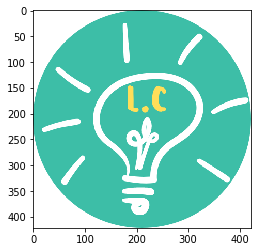

In [18]:
data = pd.DataFrame()
data = pd.read_csv("./daset/data.csv")

In [19]:
data.dropna(axis=1, inplace=True)

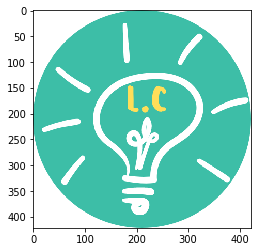

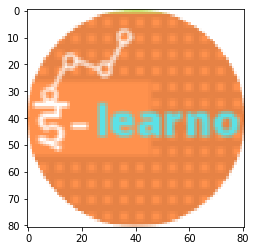

In [20]:
data.drop(labels='id',axis=1,inplace=True)
data

In [1]:
values = data.drop(labels='diagnosis',axis=1)
targets = data.diagnosis

NameError: name 'data' is not defined

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(values,targets,test_size=0.2)

In [ ]:
encoder = LabelEncoder()
encoder.fit(y_train)
y_encoded_train = encoder.fit_transform(y_train)
y_encoded_test = encoder.fit_transform(y_test)

In [2]:
class_model = models.Sequential([
  Dense(64, input_shape=[x_train.shape[1]], activation = 'sigmoid'),
  Dense(64, activation='sigmoid'),
  Dense(32, activation='sigmoid'),
  Dense(1)
])
class_model.summary()

NameError: name 'models' is not defined

In [ ]:
class_model.compile(optimizer='adam', loss=losses.binary_crossentropy, metrics=['accuracy'])

In [ ]:
history = class_model.fit(x_train,y_encoded_train, epochs=50, validation_data=(x_test,y_encoded_test), batch_size=50)

In [ ]:
plt.plot(history.history['accuracy'])

In [ ]:
plt.plot(history.history['loss'])

In [ ]:
class_model.evaluate(x_test,y_encoded_test, batch_size=50)